In [62]:
from matplotlib import pylab
from sklearn import model_selection, linear_model, metrics
import numpy as np
import pandas as pd

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
raw_data = pd.read_csv('bike_sharing_demand.csv', header=0, sep=',')

In [64]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [65]:
print(raw_data.shape)

(10886, 12)


In [66]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [67]:
raw_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [68]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [69]:
raw_data['month'] = raw_data.datetime.apply(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x: x.hour)

In [70]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [71]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [72]:
train_labels = train_data['count'].values
train_data = train_data.drop(['casual', 'registered', 'count', 'datetime'], axis=1)

In [73]:
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['casual', 'registered', 'count', 'datetime'], axis=1)

Text(0.5, 1.0, 'test data')

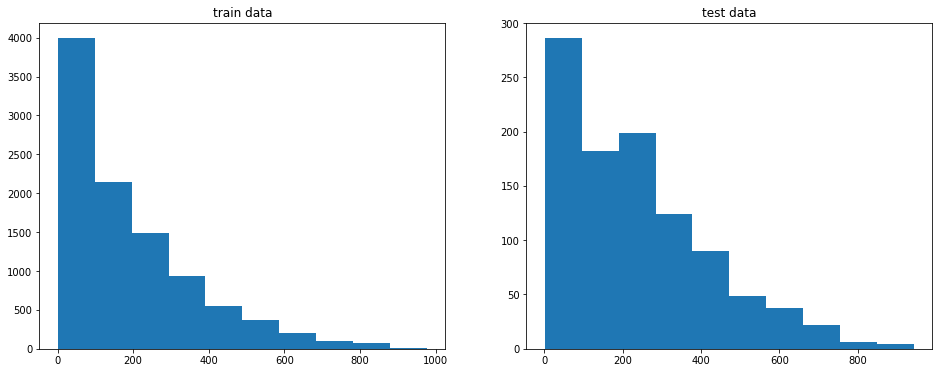

In [74]:
pylab.figure(figsize=(16,6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')

In [75]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour']
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [76]:
train_data.head()

,temp,atemp,humidity,windspeed,month,hour
0,9.84,14.395,81,0.0,1,0
1,9.02,13.635,80,0.0,1,1
2,9.02,13.635,80,0.0,1,2
3,9.84,14.395,75,0.0,1,3
4,9.84,14.395,75,0.0,1,4


In [77]:
test_data.head()

,temp,atemp,humidity,windspeed,month,hour
9886,17.22,21.210,67,6.0032,10,7
9887,18.04,21.970,62,0.0000,10,8
9888,19.68,23.485,55,16.9979,10,9
9889,20.50,24.240,48,19.0012,10,10
9890,20.50,24.240,45,27.9993,10,11


In [78]:
regressor = linear_model.SGDRegressor(random_state=0)

In [79]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

2553860624.269098

In [80]:
print(test_labels[:10])
print(regressor.predict(test_data[:10]))

[525 835 355 222 228 325 328 308 346 446]
[2.19832097e+09 2.33329299e+09 2.08508910e+09 2.06894418e+09
 1.98596687e+09 2.18055667e+09 2.32299382e+09 2.38282768e+09
 2.42266158e+09 2.54120927e+09]


In [81]:
regressor.coef_

array([-1.30302239e+08,  1.46953702e+08,  1.19447287e+07, -1.57987511e+07,
        1.40318684e+08,  9.50156149e+07])

In [82]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [83]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

121.8835371361759

In [84]:
print(test_labels[:10])
print(regressor.predict(scaled_test_data[:10]))

[525 835 355 222 228 325 328 308 346 446]
[129.85077191 151.17889998 193.33762641 222.67603091 240.57638599
 251.01130419 256.87285157 282.21391554 287.38738113 297.60744105]


In [85]:
print(regressor.coef_)

[ 30.00743714  32.15063204 -42.27737422   3.77909816  12.70734945
  50.05870387]


In [86]:
pipeline = Pipeline(steps= [('scaling', scaler), ('regression', regressor)])

In [87]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

121.8835371361759

In [88]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__early_stopping', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter_no_change', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__validation_fraction', 'regression__verbose', 'regression__warm_start'])

In [89]:
parameters_grid = {
    'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'],
    'regression__n_iter_no_change': [3, 5, 10, 50],
    'regression__penalty': ['l1', 'l2', 'none'],
    'regression__alpha': [0.0001, 0.01],
    'scaling__with_mean': [0, 1],
}

In [93]:
grid_cv = GridSearchCV(pipeline, param_grid=parameters_grid, scoring='neg_mean_absolute_error', cv=4)

In [94]:
grid_cv.fit(train_data, train_labels)

d:\development\yandex_mfti\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\development\yandex_mfti\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\development\yandex_mfti\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\development\yandex_mfti\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\devel

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('regression',
                                        SGDRegressor(random_state=0))]),
             param_grid={'regression__alpha': [0.0001, 0.01],
                         'regression__loss': ['huber', 'epsilon_insensitive',
                                              'squared_loss'],
                         'regression__n_iter_no_change': [3, 5, 10, 50],
                         'regression__penalty': ['l1', 'l2', 'none'],
                         'scaling__with_mean': [0, 1]},
             scoring='neg_mean_absolute_error')

In [95]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-109.55819508272819
{'regression__alpha': 0.01, 'regression__loss': 'epsilon_insensitive', 'regression__n_iter_no_change': 3, 'regression__penalty': 'l1', 'scaling__with_mean': 0}


In [96]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

134.96995363594178

In [97]:
np.mean(test_labels)

232.159

In [98]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [99]:
print(test_labels[:10])
print(test_predictions[:10])

[525 835 355 222 228 325 328 308 346 446]
[ 93.74842354 111.25233006 148.31976326 172.99960505 189.64669614
 199.03629529 204.90103358 225.9990577  232.56124546 241.67302703]


(-100.0, 1100.0)

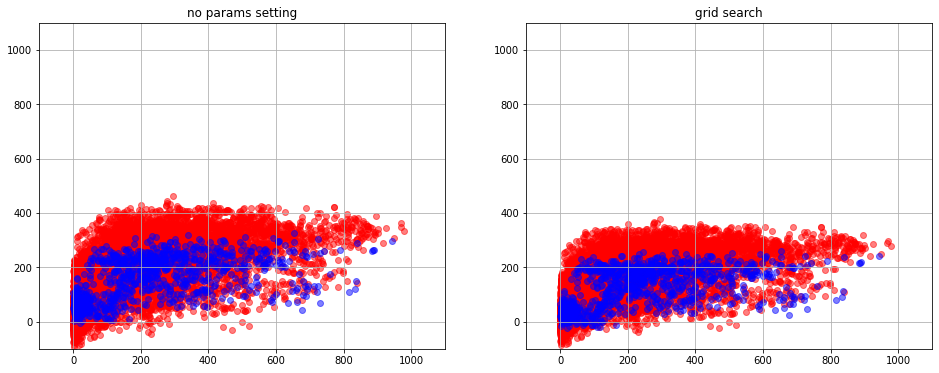

In [102]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color='blue')
pylab.title('no params setting')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color='blue')
pylab.title('grid search')
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)